##**Analisis Faktor-Faktor yang Mempengaruhi Price dan Tip pada Taco Sales Dataset 2024–2025**

##**Deskripsi Studi Kasus**

Sebuah usaha penjualan taco berupaya meningkatkan kinerja penjualannya dengan memanfaatkan data transaksi selama periode 2024–2025. Data yang tersedia mencakup berbagai informasi penting, seperti ukuran taco, jumlah topping, harga, tip pelanggan, waktu pemesanan, lokasi penjualan, serta durasi pengiriman.

Meskipun data tersebut telah terkumpul, belum dilakukan analisis mendalam untuk mengetahui faktor-faktor yang memengaruhi harga dan tip maupun pola transaksi berdasarkan waktu dan lokasi. Oleh karena itu, diperlukan proses analisis data guna mendukung penyusunan strategi harga, promosi, dan operasional yang lebih tepat dan berbasis informasi.

##**Import Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/beljar avd/taco_sales_(2024-2025).csv"
df = pd.read_csv(path)
df

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,27-05-2024 11:12,27-05-2024 12:11,59,Large,Veggie Taco,2,20.04,7.00,2.80,False
996,232442,The Taco Stand,San Antonio,03-04-2025 20:51,03-04-2025 21:29,38,Regular,Fish Taco,0,13.69,3.00,1.38,False
997,251729,Urban Tacos,Houston,23-01-2025 05:33,23-01-2025 06:41,68,Regular,Pork Taco,2,4.07,5.50,2.00,False
998,940215,Taco Fiesta,San Antonio,05-09-2024 15:49,05-09-2024 16:38,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False


##**BUSINESS UNDERSTANDING**

###**Business Objective**

Tujuan dari proyek ini adalah menganalisis pola penjualan taco berdasarkan data transaksi tahun 2024–2025 untuk membantu meningkatkan total pendapatan penjualan dan efektivitas operasional bisnis. Dengan memahami faktor-faktor yang memengaruhi harga dan tip, bisnis dapat menentukan strategi harga yang lebih tepat serta meningkatkan kualitas layanan.

###**Assess Situation**

Disaat ini bisnis taco memiliki data transaksi penjualan pada tahun 2024–2025 yang mencakup ukuran, jumlah topping, harga, tip, waktu pemesanan, lokasi, dan durasi pengiriman. Namun, data tersebut belum dianalisis untuk mengetahui faktor yang memengaruhi price dan tip, serta belum diketahui pola penjualan berdasarkan waktu dan lokasi. Jika tidak dianalisis, keputusan bisnis berisiko hanya berdasarkan asumsi.

###**Analytic Goals Project Plan**

Tujuan analisis ini adalah untuk mengidentifikasi faktor yang memengaruhi price dan tip pada penjualan taco.
Langkah yang dilakukan meliputi:
* Pembersihan dan pemeriksaan data.
* Analisis distribusi price dan tip.
* Analisis hubungan size dan topping count terhadap price.
* Perbandingan tip antara weekday dan weekend.
* Identifikasi lokasi dengan penjualan tertinggi.

###**Informasi Lanjutan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


1. Order ID: Jumlah baris 1000, Tipe data int64, Deskripsi: ID unik setiap pesanan.
2. Restaurant Name: Jumlah baris 1000, Tipe data object, Deskripsi: Nama restoran tempat pesanan dibuat.
3. Location: Jumlah baris 1000, Tipe data object, Deskripsi: Lokasi atau area pengiriman.
4. Order Time: Jumlah baris 1000, Tipe data object, Deskripsi: Waktu pesanan dibuat.
5. Delivery Time: Jumlah baris 1000, Tipe data object, Deskripsi: Waktu pesanan diterima pelanggan.
6. Delivery Duration (min): Jumlah baris 1000, Tipe data int64, Deskripsi: Lama pengiriman dalam menit.
7. Taco Size: Jumlah baris 1000, Tipe data object, Deskripsi: Ukuran taco (Regular atau Large).
8. Taco Type: Jumlah baris 1000, Tipe data object, Deskripsi: Jenis atau varian taco.
9. Toppings Count: Jumlah baris 1000, Tipe data int64, Deskripsi: Jumlah topping pada taco.
10. Distance (km): Jumlah baris 1000, Tipe data float64, Deskripsi: Jarak pengiriman dalam kilometer.
11. Price ($):jumlah baris 1000, Tipe data float64, Deskripsi: Harga pesanan dalam dolar.

12. Tip ($): Jumlah baris 1000, Tipe data float64, Deskripsi: Jumlah tip yang diberikan pelanggan.
13. Weekend Order: Jumlah baris 1000, Tipe data bool, Deskripsi: Menunjukkan apakah pesanan dilakukan saat akhir pekan (True/False).



###**Statistik Deskriptif**

In [ ]:
df.describe(include='all')

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
count,1000.000000,1000,1000,1000,1000,1000.00000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,10,10,1000,999,NaN,2,5,NaN,NaN,NaN,NaN,2
top,NaN,Urban Tacos,Chicago,19-10-2024 14:21,15-04-2025 16:06,NaN,Regular,Chicken Taco,NaN,NaN,NaN,NaN,False
freq,NaN,117,116,1,2,NaN,502,218,NaN,NaN,NaN,NaN,725
mean,552504.865000,NaN,NaN,NaN,NaN,50.93000,NaN,NaN,2.529000,13.073420,6.908250,1.806110,NaN
std,255948.779709,NaN,NaN,NaN,NaN,23.22754,NaN,NaN,1.717005,7.142268,2.310137,1.132035,NaN
min,101139.000000,NaN,NaN,NaN,NaN,10.00000,NaN,NaN,0.000000,0.510000,3.000000,0.010000,NaN
25%,331796.750000,NaN,NaN,NaN,NaN,30.00000,NaN,NaN,1.000000,6.972500,4.500000,0.907500,NaN
50%,559740.000000,NaN,NaN,NaN,NaN,53.00000,NaN,NaN,3.000000,13.200000,6.750000,1.760000,NaN
75%,771781.750000,NaN,NaN,NaN,NaN,71.00000,NaN,NaN,4.000000,19.242500,9.250000,2.520000,NaN


Secara keseluruhan, distribusi harga dan tip relatif stabil tanpa nilai ekstrem yang mencolok. Mayoritas pelanggan memilih ukuran Regular dan jenis Chicken Taco, serta sebagian besar pesanan dilakukan pada hari biasa.

###**Cek Tipe Data Pada Setiap Kolom**

In [ ]:
df.dtypes

,0
Order ID,int64
Restaurant Name,object
Location,object
Order Time,object
Delivery Time,object
Delivery Duration (min),int64
Taco Size,object
Taco Type,object
Toppings Count,int64
Distance (km),float64


Sebagian besar tipe data sudah sesuai dengan karakteristik variabelnya. Namun, kolom Order Time dan Delivery Time masih bertipe object sehingga perlu dikonversi ke datetime agar dapat digunakan untuk analisis berbasis waktu seperti identifikasi jam sibuk dan durasi pengiriman.

###**Cek Incosistent Values Pada Setiap Kolom**

Dari hasil pengecekan di setiap kolom, tidak ditemukan penulisan yang berbeda-beda atau typo. Semua data sudah konsisten dan tidak ada spasi berlebih. Jadi bisa disimpulkan kalau datanya sudah rapi dan siap untuk dianalisis lebih lanjut.

In [ ]:
print(df['Order ID'].unique())

[770487 671858 688508 944962 476417 678856 183667 379946 771088 694731
 688637 617488 590785 407757 755674 656116 422451 897549 322086 167136
 161733 665427 551989 214576 179046 324130 399105 668532 184002 707040
 314181 176066 465962 946305 680097 629959 768061 824586 934794 750810
 531712 582662 910891 373903 557592 945687 854717 540869 320392 932291
 308802 703634 907451 578634 547470 915451 452161 167348 907189 976325
 507746 691807 321941 885408 121369 368690 427110 831059 630538 841666
 965845 739979 456871 612311 355123 575786 899213 973074 147726 561865
 760021 735770 549660 264686 405407 929683 273982 385470 733039 593355
 436653 676818 639593 755788 130271 218972 605937 243139 708093 577463
 839485 205239 178463 498468 338536 440131 931016 250069 401603 362246
 410244 735863 892280 194511 626169 890785 486490 688678 139019 879238
 393328 670913 770556 681128 251716 349489 881886 862569 847006 674993
 835869 536196 195656 688967 705991 899649 289179 248766 856648 185544
 46193

In [ ]:
print(df['Restaurant Name'].unique())

['El Taco Loco' 'Taco Haven' 'Spicy Taco House' 'Casa del Taco'
 'Urban Tacos' 'The Taco Stand' 'Taco Time Express' 'Taco Fiesta'
 'Grande Tacos' 'La Vida Taco']


In [ ]:
print(df['Location'].unique())

['New York' 'San Antonio' 'Austin' 'Dallas' 'Los Angeles' 'Houston'
 'Phoenix' 'Chicago' 'San Diego' 'San Jose']


In [ ]:
print(df['Order Time'].unique())

['01-08-2024 14:55' '23-11-2024 17:11' '21-11-2024 20:24'
 '21-09-2024 06:43' '24-07-2024 11:01' '07-10-2024 21:21'
 '22-10-2024 06:03' '08-05-2025 04:51' '08-09-2024 21:04'
 '24-05-2025 02:15' '30-03-2025 01:28' '26-03-2024 04:00'
 '05-03-2025 16:52' '18-12-2024 10:01' '18-04-2025 00:01'
 '08-09-2024 18:42' '06-07-2024 02:10' '09-04-2024 17:23'
 '30-08-2024 02:48' '01-04-2025 22:52' '25-01-2024 09:34'
 '23-03-2025 13:21' '15-11-2024 07:30' '27-05-2024 17:45'
 '17-03-2024 01:09' '07-05-2024 21:03' '13-01-2025 00:12'
 '14-02-2024 09:38' '07-04-2025 04:15' '26-04-2025 02:06'
 '25-07-2024 07:24' '27-04-2025 11:14' '14-10-2024 00:29'
 '06-03-2025 18:32' '06-08-2024 20:19' '09-02-2024 10:57'
 '09-12-2024 04:24' '28-01-2024 23:36' '12-06-2024 04:06'
 '06-05-2024 05:15' '03-05-2024 15:39' '25-06-2024 18:41'
 '13-05-2025 06:05' '25-07-2024 04:39' '30-03-2024 19:47'
 '09-10-2024 21:34' '28-08-2024 05:29' '23-04-2025 02:01'
 '16-04-2025 04:59' '08-08-2024 10:09' '05-02-2024 21:29'
 '18-01-2025 2

In [ ]:
print(df['Delivery Time'].unique())

['01-08-2024 15:36' '23-11-2024 17:25' '21-11-2024 21:02'
 '21-09-2024 07:28' '24-07-2024 11:16' '07-10-2024 22:44'
 '22-10-2024 06:48' '08-05-2025 05:22' '08-09-2024 21:21'
 '24-05-2025 03:28' '30-03-2025 02:32' '26-03-2024 04:29'
 '05-03-2025 17:03' '18-12-2024 10:11' '18-04-2025 00:36'
 '08-09-2024 19:54' '06-07-2024 03:32' '09-04-2024 18:33'
 '30-08-2024 03:49' '02-04-2025 00:12' '25-01-2024 10:26'
 '23-03-2025 14:31' '15-11-2024 08:39' '27-05-2024 19:03'
 '17-03-2024 01:25' '07-05-2024 22:01' '13-01-2025 00:41'
 '14-02-2024 09:54' '07-04-2025 04:33' '26-04-2025 02:26'
 '25-07-2024 08:24' '27-04-2025 12:36' '14-10-2024 01:15'
 '06-03-2025 19:20' '06-08-2024 21:46' '09-02-2024 11:18'
 '09-12-2024 05:44' '29-01-2024 00:33' '12-06-2024 04:47'
 '06-05-2024 05:47' '03-05-2024 16:02' '25-06-2024 19:19'
 '13-05-2025 07:20' '25-07-2024 04:53' '30-03-2024 20:46'
 '09-10-2024 22:39' '28-08-2024 06:31' '23-04-2025 03:23'
 '16-04-2025 05:50' '08-08-2024 11:24' '05-02-2024 22:10'
 '19-01-2025 0

In [ ]:
print(df['Delivery Duration (min)'].unique())

[41 14 38 45 15 83 31 17 73 64 29 11 10 35 72 82 70 61 80 52 69 78 16 58
 18 20 60 46 48 87 21 57 32 23 75 59 65 62 51 81 40 27 79 26 76 39 71 56
 42 19 24 66 33 50 44 49 53 68 89 22 13 77 55 54 37 85 12 28 34 74 30 63
 67 25 88 43 36 84 86 47 90]


In [ ]:
print(df['Taco Size'].unique())

['Regular' 'Large']


In [ ]:
print(df['Taco Type'].unique())

['Chicken Taco' 'Beef Taco' 'Pork Taco' 'Veggie Taco' 'Fish Taco']


In [ ]:
print(df['Toppings Count'].unique())

[5 1 2 0 3 4]


In [ ]:
print(df['Distance (km)'].unique())

[ 3.01  6.2  20.33  3.   24.34 16.7   9.57  9.8  10.33  6.99 24.93  2.06
 19.33 12.94 13.71 22.03 12.41 21.87 11.56  0.68  7.32  5.17 10.36  5.
  4.57 23.2  24.23  4.36 23.57 13.31  8.25  5.72 17.74  3.33 17.34  0.59
  3.24  1.52 22.16 18.55  5.95  8.54 23.51  8.97 17.87  8.19  7.74 20.93
 17.05 16.98 11.66 17.35  6.61 20.47 21.08 17.98 17.5   5.57  7.82  7.19
  1.16  1.73 20.96 23.77 23.72  3.15 20.85 11.   16.07 19.48  6.47  5.7
  2.6   7.71 13.98  3.43 15.12 17.85 14.56 10.32  3.4   7.79  5.67 11.54
  6.22 20.75 17.37 22.29  1.49 12.02 23.66 24.27  9.36 22.08  2.78 17.78
 23.09 18.29 14.02  1.57 12.81 21.84 21.38 17.27  7.84 13.51  6.4   0.73
 16.15  9.84 19.57  5.16 14.7  21.97 11.97  6.98  1.11 10.5  10.02 15.58
  2.93  2.75  5.53  0.57  0.86 18.67  5.93 10.94  7.24 15.33  8.8  17.33
  1.97 15.21 21.21 20.82 14.37  8.85 18.98  5.78  8.06  7.59 20.92 14.61
 20.13 10.31  3.29  6.77 11.5  11.99 11.57 14.08 12.78 17.84 10.51  9.97
 24.21 16.92  8.07 21.19  4.28 18.13 22.65 10.76 23.39

In [ ]:
print(df['Price ($)'].unique())

[ 9.25  4.25  7.    5.5   4.5   3.    5.75  6.75  8.    9.5   8.25 10.75]


In [ ]:
print(df['Tip ($)'].unique())

[2.22 3.01 0.02 1.9  1.14 2.32 0.63 2.97 0.33 1.23 0.69 1.02 0.32 2.34
 4.16 0.35 1.27 0.74 2.12 1.46 0.48 1.39 2.43 2.36 1.74 2.88 1.71 4.67
 2.26 1.33 1.84 2.56 2.31 2.84 1.82 1.22 1.   2.45 2.59 0.01 2.54 0.38
 0.91 1.53 0.67 2.66 4.46 2.55 0.83 0.7  3.53 2.1  1.95 1.18 1.41 1.4
 0.08 0.73 1.11 2.49 2.39 2.16 2.02 1.76 2.68 2.94 0.22 2.29 1.77 3.3
 1.78 1.32 0.21 3.67 2.27 2.04 2.44 1.45 2.98 2.08 1.52 2.51 1.63 2.23
 2.91 2.58 0.86 0.14 2.83 2.74 4.02 1.08 4.87 0.75 2.2  1.1  0.23 0.62
 2.65 0.42 1.86 2.82 2.06 0.64 4.29 3.95 2.63 3.08 0.54 3.17 0.3  1.42
 4.78 1.05 0.8  1.2  1.85 0.15 1.54 0.66 0.36 2.42 1.72 3.09 0.24 0.52
 2.77 1.89 0.17 2.38 2.87 0.76 3.49 2.85 0.97 0.49 3.56 1.31 1.93 2.5
 1.19 1.99 1.16 0.31 3.48 0.6  0.57 2.18 1.98 2.61 2.25 1.94 0.13 1.07
 2.14 2.78 1.48 1.35 2.6  1.13 2.67 1.01 1.92 1.36 0.72 0.65 3.12 3.77
 0.05 3.28 2.09 4.71 2.41 2.17 2.89 3.66 0.53 2.95 4.77 2.75 1.25 2.24
 1.15 1.97 2.47 1.26 3.36 2.33 4.09 4.74 1.17 4.15 3.88 1.47 1.37 0.96
 2.92 2.0

In [ ]:
print(df['Weekend Order'].unique())

[False  True]


###**Missing Values**

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Order ID,0.0
Restaurant Name,0.0
Location,0.0
Order Time,0.0
Delivery Time,0.0
Delivery Duration (min),0.0
Taco Size,0.0
Taco Type,0.0
Toppings Count,0.0
Distance (km),0.0


Disini terlihat tidak ada data missing values.

###**Duplicated Values**

In [ ]:
df[df.duplicated()]

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order


Disini terlihat tidak ada data yang terduplikasi.

###**Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Order ID,0.0
Delivery Duration (min),0.0
Toppings Count,0.0
Distance (km),0.0
Price ($),0.0
Tip ($),0.3


Disini terlihat ada sedikit nilai yang berbeda atau adanya outliers pada kolom tip yaitu sebesar 0,3%

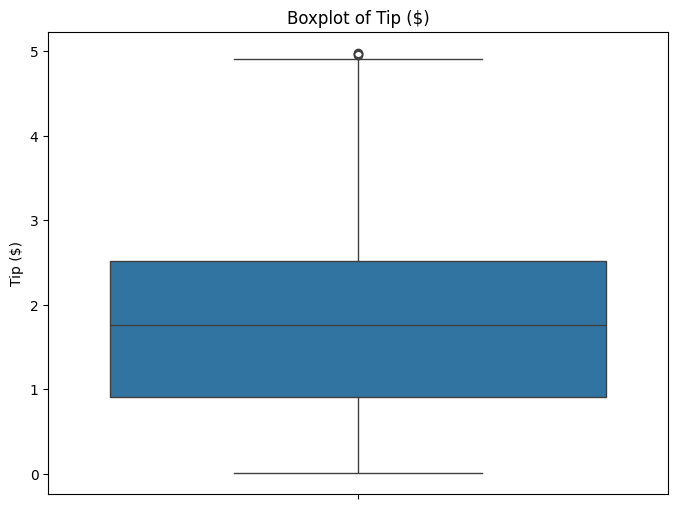

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Tip ($)'])
plt.title('Boxplot of Tip ($)')
plt.ylabel('Tip ($)')
plt.show()

Boxplot pada kolom Tip ($) menunjukkan bahwa mayoritas tip berada pada kisaran 1–2.5 dolar dengan median sekitar 1.9 dolar. Terdapat satu outlier yang menunjukkan adanya tip yang jauh lebih tinggi dibanding transaksi lainnya.

##**EDA**

###**Comparison (Perbandingan)**

Meskipun taco ukuran Large memiliki rata-rata harga lebih tinggi dibandingkan Regular, perbedaannya tidak terlalu besar sehingga ukuran bukan faktor dominan dalam menentukan price.

/tmp/ipython-input-401179643.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_size.index, y=avg_price_size.values, palette='viridis')


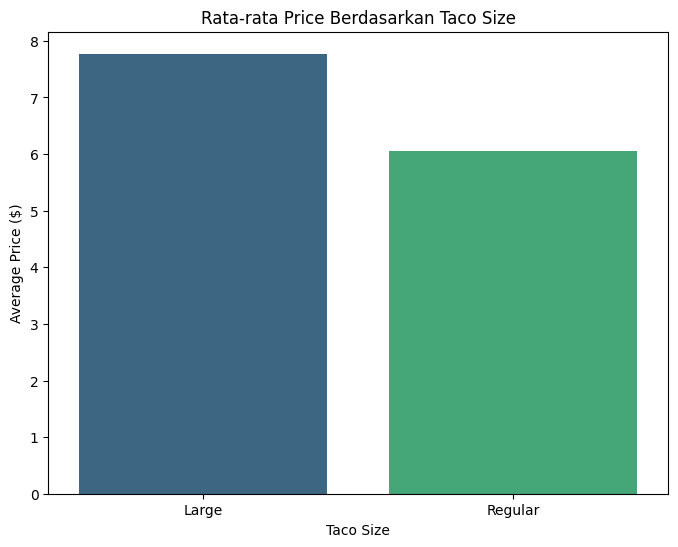

In [ ]:
avg_price_size = df.groupby('Taco Size')['Price ($)'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=avg_price_size.index, y=avg_price_size.values, palette='viridis')
plt.title('Rata-rata Price Berdasarkan Taco Size')
plt.xlabel('Taco Size')
plt.ylabel('Average Price ($)')
plt.show()

###**Composition (Komposisi)**

Diagram menunjukkan bahwa Chicken Taco memiliki kontribusi revenue tertinggi, sedangkan Beef Taco terendah. Namun secara keseluruhan, kontribusi antar jenis taco relatif seimbang tanpa dominasi yang signifikan.

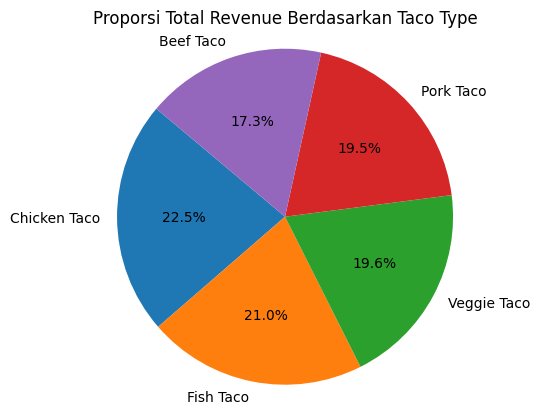

In [ ]:
sales_by_type = df.groupby('Taco Type')['Price ($)'].sum().sort_values(ascending=False)
plt.figure()
plt.pie(sales_by_type.values,
        labels=sales_by_type.index,
        autopct='%1.1f%%',
        startangle=140)

plt.title('Proporsi Total Revenue Berdasarkan Taco Type')
plt.axis('equal')
plt.show()

###**Distribution (Distribusi)**

Tingginya frekuensi pada beberapa rentang harga menunjukkan bahwa harga tersebut merupakan harga yang paling banyak dipilih pelanggan. Namun, tidak terdapat nilai harga yang menyimpang secara ekstrem, sehingga distribusi harga tergolong stabil.

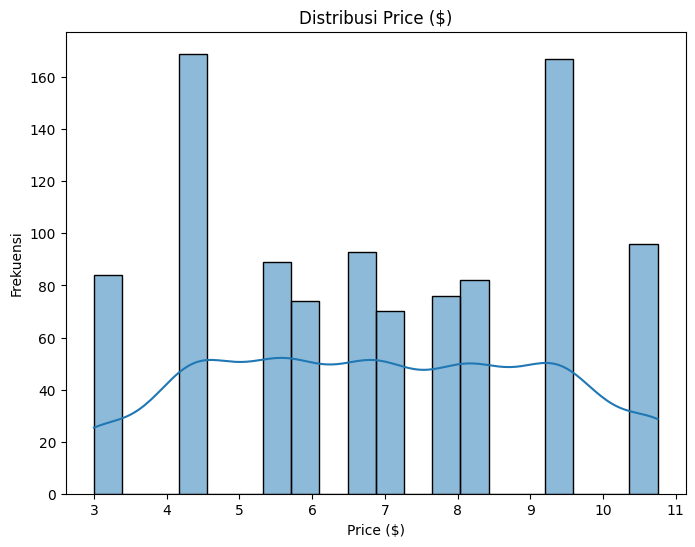

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price ($)'], bins=20, kde=True)

plt.title('Distribusi Price ($)')
plt.xlabel('Price ($)')
plt.ylabel('Frekuensi')
plt.show()

###**Relationship (Hubungan)**

Menurut saya relasi antar variabel sudah cukup baik. Namun, pada bagian delivery duration agak kurang berkolerasi dengan yang lain karna terlihat meiliki nilai negatif.

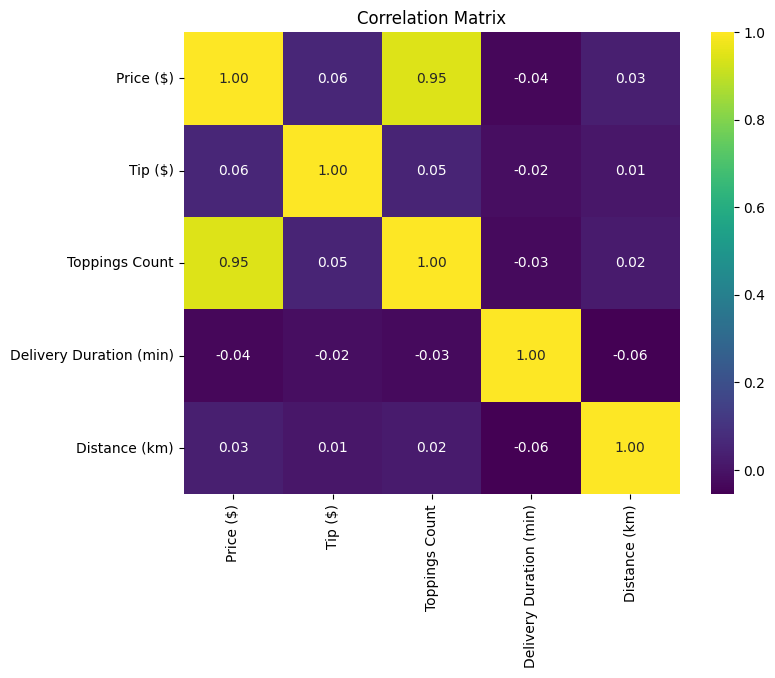

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(
    df[['Price ($)', 'Tip ($)', 'Toppings Count',
        'Delivery Duration (min)', 'Distance (km)']].corr(),
    annot=True,
    cmap='viridis',
    fmt='.2f'
)

plt.title('Correlation Matrix')
plt.show()